In [4]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('../'))
from dynamo.prepare_dataset import PrepareDataset



In [5]:
wd = './data/'

In [6]:
# male
male_df = pd.read_csv(wd + 'data_original/raw_files/male_assigned_sample_names.csv', 
                      index_col = [0]).sort_index()
# female
female_df = pd.read_csv(wd + 'data_original/raw_files/female_assigned_sample_names.csv', 
                        index_col = [0]).sort_index()
# donorA
donorA_df = pd.read_csv(wd + 'data_original/raw_files/donorA_assigned_sample_names.csv', 
                        index_col = [0]).iloc[:-1].sort_index() #remove last row as is Nan
donorA_df.index = donorA_df.index.astype(int) 
donorA_df = donorA_df[~donorA_df.index.duplicated(keep=False)]

# donorB
donorB_df = pd.read_csv(wd + 'data_original/raw_files/donorB_assigned_sample_names.csv', 
                        index_col = [0]).iloc[:-1].sort_index() #remove last observation as is the gape is too big t be interpolated
donorB_df.index = donorB_df.index.astype(int)
donorB_df = donorB_df[~donorB_df.index.duplicated(keep=False)]

## Interpolate data using PCHIP

In [7]:
path = wd + 'data_tests/first_interpolation_files/'

In [8]:
PrepareDataset.interpolate_pchip(donorA_df, path, 'donorA')

timestep,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,4,7,0,0,1,0,1,0,0,0,...,0,0,0,4,4,5,2,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,123,197,160,0,19,28,2139,1167,196,269,...,167,10,325,26,427,152,1502,1449,1082,86
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
donorA_pchip_interpolated = pd.read_csv(wd + 'data_original/first_interpolation_files/donorA_pchip_interpolated.tsv', sep='\t',  index_col = 0)
donorA_pchip_interpolated

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,4,7,0,0,1,0,1,0,0,0,...,0,0,0,4,4,5,2,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,123,197,160,0,19,28,2139,1167,196,269,...,167,10,325,26,427,152,1502,1449,1082,86
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
max_depth = 18000
df =donorA_pchip_interpolated

rarefied_table = PrepareDataset.rarefy_df(df, max_depth)


In [13]:
rarefied_table

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,27,46,32,0,0,2,218,136,22,48,...,9,0,44,1,25,92,351,349,223,17
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
donorA_pchip_interpolated = pd.read_csv(wd + 'data_original/first_interpolation_files/donorA_pchip_interpolated.tsv', sep='\t',  index_col = 0)

donorB_pchip_interpolated = pd.read_csv(wd + 'data_original/first_interpolation_files/donorB_pchip_interpolated.tsv', sep='\t',  index_col = 0)

female_pchip_interpolated = pd.read_csv(wd + 'data_original/first_interpolation_files/female_pchip_interpolated.tsv', sep='\t',  index_col = 0)

male_pchip_interpolated = pd.read_csv(wd + 'data_original/first_interpolation_files/male_pchip_interpolated.tsv', sep='\t',  index_col = 0)

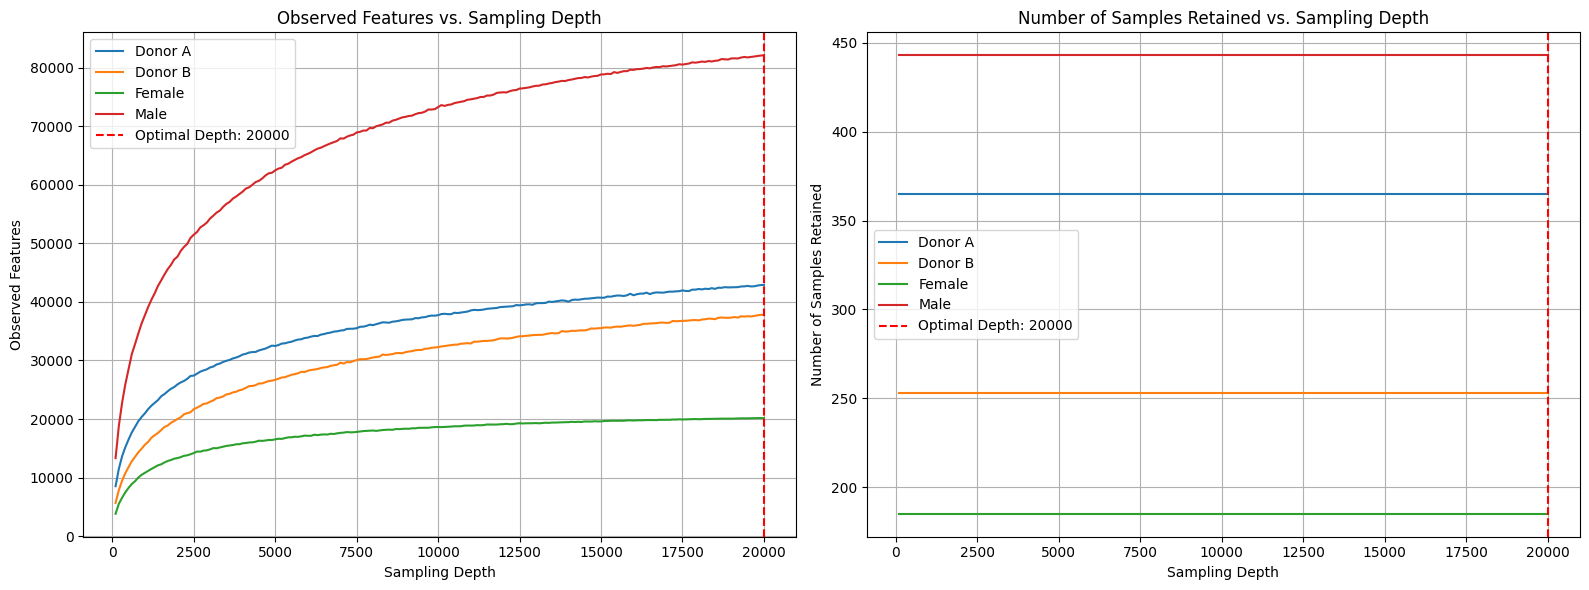

In [15]:
datasets = [donorA_pchip_interpolated, donorB_pchip_interpolated,
            female_pchip_interpolated, male_pchip_interpolated]
dataset_labels = ['Donor A', 'Donor B','Female', 'Male' ]

best_depth = PrepareDataset.plot_alpha_rarefaction(datasets, dataset_labels)

In [16]:
sampling_depth = best_depth

donorA_rarefied_df = PrepareDataset.rarefy_df(donorA_pchip_interpolated, sampling_depth)
donorB_rarefied_df = PrepareDataset.rarefy_df(donorB_pchip_interpolated, sampling_depth)
female_rarefied_df = PrepareDataset.rarefy_df(female_pchip_interpolated, sampling_depth)
male_rarefied_df = PrepareDataset.rarefy_df(male_pchip_interpolated, sampling_depth)

In [17]:
donorA_pchip_interpolated

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,4,7,0,0,1,0,1,0,0,0,...,0,0,0,4,4,5,2,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,123,197,160,0,19,28,2139,1167,196,269,...,167,10,325,26,427,152,1502,1449,1082,86
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
donorA_rarefied_df

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,36,45,43,0,2,3,266,155,44,41,...,19,0,50,0,37,99,394,345,228,25
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Interpolate after rarefaction

In [19]:
path = wd + 'data_tests/ready_files/'

In [20]:
rarefied_table_df = rarefied_table.T
rarefied_table_df.index = rarefied_table_df.index.astype(int)
rarefied_table_df

,TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGCGGATTGGTCAGTCTGTCTTAAAAGTTCGGGGCTTAACCCCGTGATGG,TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTGATAAGTCTGAAGTTAAAGGCTGTGGCTCAACCATAGTTCGC,TACGGAAGGTCCAGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCTGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGAATTG,TACGTATGTCACAAGCGTTATCCGGATTTATTGGGCGTAAAGCGCGTCTAGGTGGTTATGTAAGTCTGATGTGAAAATGCAGGGCTCAACTCTGTATTGC,TACGTAGGTGGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGCGCGCGCAGGTGGTTTAATAAGTCTGATGTGAAAGCCCACGGCTCAACCGTGGAGGGG,...,TACGTAGGTGGCGAGCGTTATCCGGATTTACTGGGTGTAAAGGGCGCGTAGGCGGGAATGCAAGTCAGATGTGAAATCCAGGGGCTTAACCCTTGGACTG,TACGTAGGTGGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCTTGATAAGTCAGTGGTTAAAGGTAGCAGCTTAAATGTTTTACAT,TACGTAGGGCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCTGTGAAAGACCTGGGCTCAACTCCGGGTCTG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGGAGCGTAGACGGTAAAGCAAGTCTGAAGCGAAAGCCCGCGGCTCAACTGCGGGACTG,TACGTAGGGTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCTGTGAAAACCCGAGGCTCCACCTCGGGCCTG,TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,TACGTAGGTGGCGAGCGTTGTCCGGATTTACTGGGCGTAAAGGGAGCGTAGGCGGATTTTTAAGTGAGATGTGAAATACTCAGGCTTAACCTGAGTGCTG
0,0,2,27,0,0,35,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,46,0,0,32,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,32,0,0,27,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,8,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,3,92,0,0,17,60,0,0,2,...,0,0,0,0,0,0,0,0,0,0
361,0,0,351,0,0,22,183,0,0,7,...,0,0,0,0,0,0,0,0,0,0
362,0,0,349,0,0,18,167,0,0,1,...,0,0,0,0,0,0,0,0,0,0
363,0,0,223,0,0,9,143,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [21]:
PrepareDataset.interpolate_pchip(rarefied_table_df, path, 'donorA_rarefied_18000')

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
TACGTAGGGTGCGAGCGTTAATCGGAATTACTGGGCGTAAAGCGAGCGCAGACGGTTACTTAAGCAGGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTAGGTCCCGAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTAGATAAGTCTGAAGTTAAAGGCTGTGGCTTAACCATAGTACGC,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,0,0,0
TACGGAGGGTGCGAGCGTTAATCGGAATAACTGGGCGTAAAGGGCACGCAGGCGGTGACTTAAGTGAGGTGTGAAAGCCCCGGGCTTAACCTGGGAATTG,27,46,32,0,0,2,218,136,22,48,...,9,0,44,1,25,92,351,349,223,17
TACGGAAGGTTCGGGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGGCCGGAGATTAAGTGTGTTGTGAAATGTAGACGCTCAACGTCTGACTTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGTTAAGTCAGCGGTGAAATCTAGGAGCTTAACTCCTAAATTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAGGGCATGGGCTCAACCTGTGGACTGC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGAGGGCCTCGAGCGTTATCCGGAATTATTGGGCGTAAAGTGTGCGTAGGCGGCATTGTTAGTCGAGAGTTAAATCCTGGGGCTCAACCTCAGAATCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TACGTATGGTGCAAGCGTTATCCGGATTTATTGGGTTTAAAGGGAGCGTAGATGGGTTGTTAAGTCAGATGTGAAATCCCCGGGCTCAACCTGGGAACTG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
